In [0]:
#Code source https://github.com/ageron/handson-ml/

In [0]:
#HW4.1. This HW involves a lot of the repetition of the code from HW3. 

#You will need to figure out the part that is repeated from your HW3 solution.
#YOu will also also modify numeric features, split date into predictors and labels, as well as into a training and testing datasets. 
#You will also run a simple classifier on data and calculate performance metrics.
#specifically, missing values are imputed and featured are scaled
#finally, the resulting prepared dataset is saved in a .csv file


In [68]:
print("Leela Kishan Kolla")

Leela Kishan Kolla


In [3]:
#import pandas and read .csv file, drop customerID column, display the head

# see from HW 3

import pandas as pd
import numpy as np
data_set = pd.read_csv("Telcos.csv")
data_set.head()
data_set.tail()
new_data_set = data_set.drop(["customerID"], axis = 1 )
new_data_set


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# display data type info for all columns

new_data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [5]:
#converting TotalCharges to float data type
#new_data_set.astype({"TotalCharges":float}, errors="coerce")
#new_data_set[["TotalCharges"]] = new_data_set[["TotalCharges"].apply(pd.float)
#new_data_set.info()                                    
new_data_set["TotalCharges"] = pd.to_numeric(new_data_set.TotalCharges ,errors='coerce' )
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [6]:
#converting SeniorCitizen to a categorical column for future convenience

new_data_set["SeniorCitizen"] = pd.Categorical(new_data_set.SeniorCitizen)
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null category
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: category(1), float64(2), int64(1), object(16)
memory usage: 1.

In [7]:
#getting descriptive statistics on numeric columns
new_data_set.describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [0]:
#visualising numeric data using a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0fbb28828>,
      dtype=object)

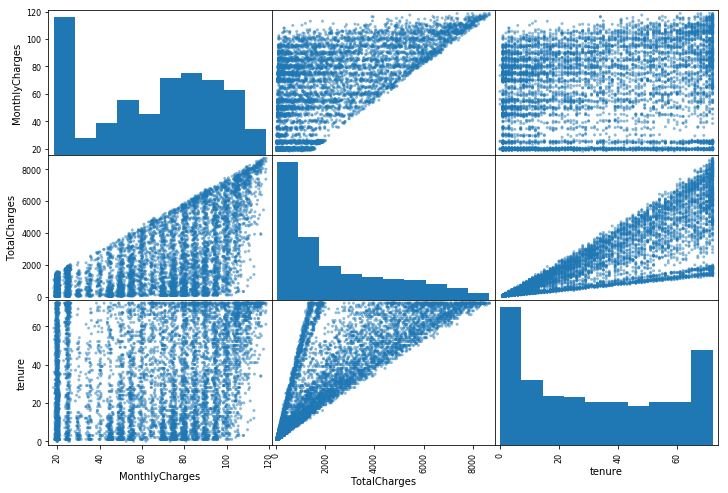

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["MonthlyCharges", "TotalCharges", "gender", "tenure"]
scatter_matrix(new_data_set[attributes], figsize=(12,8))


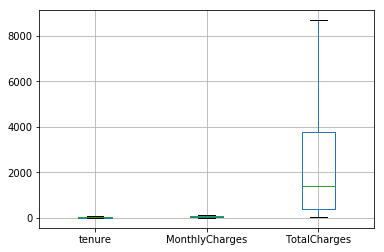

In [10]:
new_data_set.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

In [0]:
#P3.2. Dealing with categorical variables 
#Display value counts for InternetService and SeniorCitizen variables
#Convert categorical variables (those with the data type object) to numerical using LabelEncoder class from sklearn.preprocessing
#Convert variables that have more than 2 categories to one-hot vectors using OneHotEncoder class from sklearn.preprocessing
#Combine numeric variables, encoded variables with two categories, and variables encoded into one-hot arrays into one data frame. 
#Creating a data ndarray from the df_complete dataframe

In [0]:
#spliting data columns into numeric and categorical

df_num_counter=0
df_other_counter=0
for col in new_data_set:
    if (new_data_set[col].dtype)in ["int64", "float64"]:
        df_num_col=pd.DataFrame(new_data_set[col], columns=[col])
        if df_num_counter==0:
            df_num=df_num_col
        else:
            df_num=df_num.join(df_num_col)
        df_num_counter=df_num_counter+1
    else:
        df_other_col=pd.DataFrame(new_data_set[col], columns=[col])
        if df_other_counter==0:
            df_other=df_other_col
        else:
            df_other=df_other.join(df_other_col)
        df_other_counter=df_other_counter+1  

In [12]:
#displaying numeric columns data frame
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [13]:
col_names=list(df_num)
col_names

['tenure', 'MonthlyCharges', 'TotalCharges']

SyntaxError: ignored

In [0]:
# The next few lines deal with transforming numeric data

In [44]:
#imputing missing values
#scaling numeric data

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
imputer= SimpleImputer(strategy="median")
scaler=StandardScaler()


col_names=list(df_num)
num_col=np.array(df_num)
num_col_imp= imputer.fit_transform(num_col)
num_col_scaled=scaler.fit_transform(num_col_imp)

num_col_scaled

df_num_scaled=pd.DataFrame(num_col_scaled, columns=col_names)

df_num_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [45]:
#displaying non-numeric columns data frame
df_other.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


!pip install -U scikit-learn

In [20]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [46]:
#encoding non_numeric columns


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
i=0
for col in df_other:
    x_enc=encoder.fit_transform(df_other[col])
    df_enc=pd.DataFrame(x_enc, columns=[col])
    if i>0:
        df_cat=df_cat.join(df_enc)
    else:
        df_cat=df_enc
    i=i+1
    #print(col, " ", encoder.classes_)
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [0]:
#splitting encoded columns into binary and multi-category data frames

bin_count=0
mult_count=0

for col in df_cat:
    #print(df_cat[col].value_counts())
    if len(df_cat[col].unique())>2:
        #print (col, "has ", len(df_cat[col].unique()), " unique values")
        mult_col=df_cat[col]
        if mult_count==0:
            df_mult=pd.DataFrame(mult_col, columns=[col])
        else:
            df_mult=df_mult.join(mult_col)
        mult_count=mult_count+1
    else:
        bin_col=df_cat[col]
        if bin_count==0:
            df_bin=pd.DataFrame(bin_col, columns=[col])
        else:
            df_bin=df_bin.join(bin_col)
        bin_count=bin_count+1


In [48]:
#displaying multiple category columns
df_mult.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,0,0,2,0,0,0,0,0,2
1,0,0,2,0,2,0,0,0,1,3
2,0,0,2,2,0,0,0,0,0,3
3,1,0,2,0,2,2,0,0,1,0
4,0,1,0,0,0,0,0,0,0,2


In [49]:
#displaying binary columns
df_bin.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,1,1,1
3,1,0,0,0,0,0,0
4,0,0,0,0,1,1,1


In [50]:
#converting multi-category columns to one-hot-arrays using loops

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

df_counter=0
for col in df_mult:

    v_len=len(df_mult[col].unique())
    col_names=[]
    i=0
    col_pref=col
    while i<v_len:
            i=i+1
            col_name=col_pref+str(i)
            col_names.append(col_name)
    #print (col_names)    
    next_cols_hot1_enc=encoder.fit_transform(df_mult[col].values.reshape(-1,1))
    next_cols=next_cols_hot1_enc.toarray()
    df_next_cols=pd.DataFrame(next_cols, columns=[col_names])
    
    if df_counter==0:
        df_mult_one_hot=df_next_cols
    else:
        df_mult_one_hot=df_mult_one_hot.join(df_next_cols)
    df_counter=df_counter+1   
    
df_mult_one_hot.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

,MultipleLines1,MultipleLines2,MultipleLines3,InternetService1,InternetService2,InternetService3,OnlineSecurity1,OnlineSecurity2,OnlineSecurity3,OnlineBackup1,OnlineBackup2,OnlineBackup3,DeviceProtection1,DeviceProtection2,DeviceProtection3,TechSupport1,TechSupport2,TechSupport3,StreamingTV1,StreamingTV2,StreamingTV3,StreamingMovies1,StreamingMovies2,StreamingMovies3,Contract1,Contract2,Contract3,PaymentMethod1,PaymentMethod2,PaymentMethod3,PaymentMethod4
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
#combinig one_hot encoded and binary columns

df_enc_complete=df_bin.join(df_mult_one_hot)
df_enc_complete.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,"(MultipleLines1,)","(MultipleLines2,)","(MultipleLines3,)","(InternetService1,)","(InternetService2,)","(InternetService3,)","(OnlineSecurity1,)","(OnlineSecurity2,)","(OnlineSecurity3,)","(OnlineBackup1,)","(OnlineBackup2,)","(OnlineBackup3,)","(DeviceProtection1,)","(DeviceProtection2,)","(DeviceProtection3,)","(TechSupport1,)","(TechSupport2,)","(TechSupport3,)","(StreamingTV1,)","(StreamingTV2,)","(StreamingTV3,)","(StreamingMovies1,)","(StreamingMovies2,)","(StreamingMovies3,)","(Contract1,)","(Contract2,)","(Contract3,)","(PaymentMethod1,)","(PaymentMethod2,)","(PaymentMethod3,)","(PaymentMethod4,)"
0,0,0,1,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
#cobmining scaled numeric columns with binary and one-hot-encoded

df_complete=df_num_scaled.join(df_enc_complete)
df_complete.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,"(MultipleLines1,)","(MultipleLines2,)","(MultipleLines3,)","(InternetService1,)","(InternetService2,)","(InternetService3,)","(OnlineSecurity1,)","(OnlineSecurity2,)","(OnlineSecurity3,)","(OnlineBackup1,)","(OnlineBackup2,)","(OnlineBackup3,)","(DeviceProtection1,)","(DeviceProtection2,)","(DeviceProtection3,)","(TechSupport1,)","(TechSupport2,)","(TechSupport3,)","(StreamingTV1,)","(StreamingTV2,)","(StreamingTV3,)","(StreamingMovies1,)","(StreamingMovies2,)","(StreamingMovies3,)","(Contract1,)","(Contract2,)","(Contract3,)","(PaymentMethod1,)","(PaymentMethod2,)","(PaymentMethod3,)","(PaymentMethod4,)"
0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.066327,-0.259629,-0.173244,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.236724,-0.362660,-0.959674,1,0,0,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.514251,-0.746535,-0.194766,1,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.940470,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
#saving data to a file
df_complete.to_csv('Telcos_ready.csv')

In [56]:
import pandas as pd
import numpy as np
df_complete=pd.read_csv('Telcos_ready.csv')

df_telcos_features=df_complete.drop("Churn", axis=1)
df_telcos_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
Unnamed: 0                7043 non-null int64
tenure                    7043 non-null float64
MonthlyCharges            7043 non-null float64
TotalCharges              7043 non-null float64
gender                    7043 non-null int64
SeniorCitizen             7043 non-null int64
Partner                   7043 non-null int64
Dependents                7043 non-null int64
PhoneService              7043 non-null int64
PaperlessBilling          7043 non-null int64
('MultipleLines1',)       7043 non-null float64
('MultipleLines2',)       7043 non-null float64
('MultipleLines3',)       7043 non-null float64
('InternetService1',)     7043 non-null float64
('InternetService2',)     7043 non-null float64
('InternetService3',)     7043 non-null float64
('OnlineSecurity1',)      7043 non-null float64
('OnlineSecurity2',)      7043 non-null float64
('OnlineSecurity3',)      7043 non-null flo

In [57]:
telcos_labels=df_complete["Churn"]
df_telcos_labels=pd.DataFrame(telcos_labels, columns=["Churn"])
df_telcos_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
Churn    7043 non-null int64
dtypes: int64(1)
memory usage: 55.1 KB


In [0]:
#creating numpy arrays
X=np.array(df_telcos_features)
y=np.array(df_telcos_labels)

In [59]:
#creating test and train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#getting the shape of X_train array
n, m=X_train.shape
n, m

(5634, 41)

In [60]:
#getting the shape of X_test array
n, m=X_test.shape
n, m

(1409, 41)

In [0]:
#H7.2. Fitting logistic regression, assessing model accurasy vis-a-vis baseline classifier 

In [61]:
#Import and fit LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#assessing model accuracy for train dataset using cross-validation
# for your HW submission increase the number of folds to 10 
#by changing the cv parameter

y_train_pred=log_reg.predict(X_train)
y_test_pred=log_reg.predict(X_test)
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train.ravel(), cv=5, scoring="accuracy")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.80939716, 0.8065661 , 0.79503106, 0.78863233, 0.80284192])

In [0]:
#assessing model accuracy for train dataset using cross-validation
y_test_pred=log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_pred, y_test.ravel())

In [64]:
y_train_pred=log_reg.predict(X_train)
n_correct=sum(y_train_pred==y_train.ravel())
n_correct
print("Testing Accuracy: ", n_correct/len(y_train_pred))

Testing Accuracy:  0.8015619453319134


In [0]:
#what about the accuracy of a classifier that will simply predict no churn?

from sklearn.base import BaseEstimator

class NeverChurnClassifier(BaseEstimator):
    def fit (self, y=None):
        pass
    def predict (self, X):
        return np.zeros((len(X), 1), dtype="int64")
    

In [66]:
nccf=NeverChurnClassifier()
y_train_nccf_pred=nccf.predict(X_train)
n_correct=sum(y_train_nccf_pred==y_train)
n_correct
print("Baseline Accuracy: ", n_correct/len(y_train_pred))


Baseline Accuracy:  [0.73446929]


In [67]:
#computing precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision=precision_score(y_train_pred, y_train)
recall=recall_score(y_train_pred, y_train)
f1=f1_score(y_train_pred, y_train)
print (precision, recall, f1)

0.5347593582887701 0.6546644844517185 0.5886681383370126
